<div align="center">
  <b> <font size="6">Polynomial Regression (Non-Linear fitting)</font> </b>
</div>

<div align="center">
  <b> <font size="4">Let us work on a real dataset with Sci-Kit (SK) Learn for Multiple Orders (1, 2, 3, 6, 10, 20)</font> </b>
</div>

In [37]:
# Import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

### Step 1: Load the dataset

In [38]:
df = pd.read_csv('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
df.shape

(545, 13)

### Step 2: Apply EDA

##### Univariate analysis

In [40]:
# Statistics summary
df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [41]:
df["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

<AxesSubplot:>

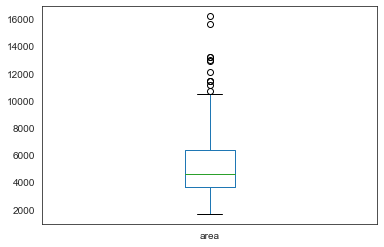

In [42]:
# Univariate Analysis using Boxplot
sns.set_style(style='white') 
df.boxplot(column =['area'], grid = False)  

<AxesSubplot:>

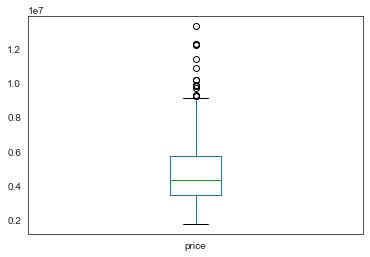

In [43]:
sns.set_style(style='white') 
df.boxplot(column =['price'], grid = False) 

##### Bivariate analysis

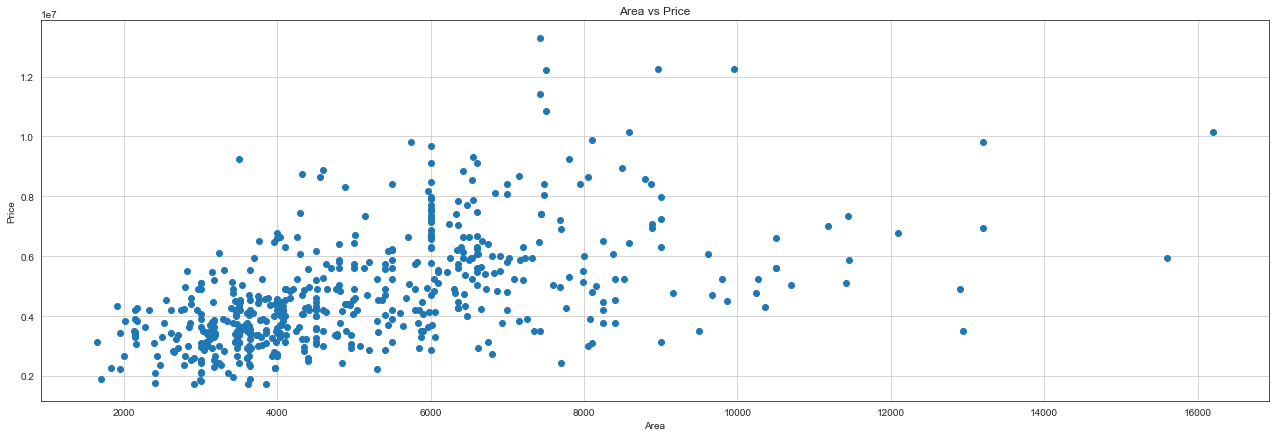

In [44]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(df["area"],df["price"])
plt.grid(b=None)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

In [45]:
# Correlation
r = df["area"].corr(df["price"]) 
print("Correlation value : ",round(r,2)*100,"%")
# Spearman's rho
# df["area"].corr(df["price"], method='spearman')    
# Kendall's tau
# df["area"].corr(df["price"], method='kendall')   

Correlation value :  54.0 %


Applying linear regression may not be helpful, so lets try to fit non-linear models.

### Step 3. Pre-process and extract the features

In [46]:
# Load only area and price features
extracted = df.loc[:, ['area', 'price']]
extracted.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [47]:
# pre-process: Scale the values of those features between 0 and 1
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
temp = scaler.fit_transform(extracted)
temp

array([[0.39656357, 1.        ],
       [0.5024055 , 0.90909091],
       [0.57113402, 0.90909091],
       ...,
       [0.13539519, 0.        ],
       [0.08659794, 0.        ],
       [0.15120275, 0.        ]])

In [48]:
pre_processed = pd.DataFrame(temp,columns=["area","price"])
pre_processed.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


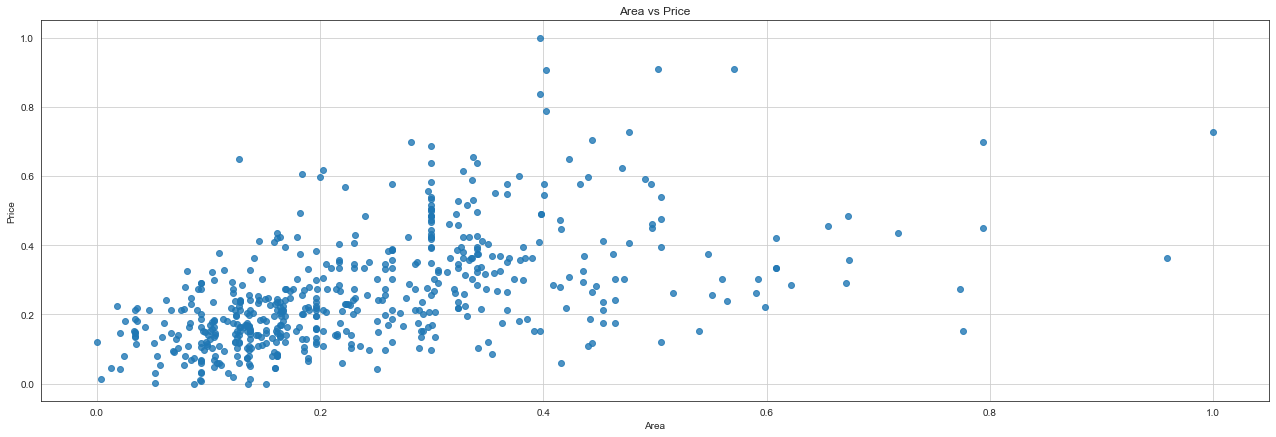

In [49]:
# visualise area-price relationship
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
sns.regplot(x="area", y="price", data=pre_processed, fit_reg=False)
plt.grid(b=None)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

### Step 4. Split the data for training and testing

In [50]:
# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(pre_processed, train_size = 0.8, test_size = 0.2, random_state = 10) 

In [51]:
# split into x and y for both train and test sets  
x_train = train['area'].values.reshape(-1, 1) 
y_train = train['price']

x_test = test['area'].values.reshape(-1, 1)
y_test = test['price']

### Step 5: Training and Testing for polynomial model with order 1, 2, 3, 6, 10, 20

Let's now predict the output value (for both train and test sets) and store the predictions in a table. Each row of the table is one data point, each column is a value of $n$ (degree).

<table style="width:100%">
  <tr>
    <th>   </th>
    <th>degree-1</th>
    <th>degree-2</th> 
    <th>degree-3</th>
    <th>...</th>
    <th>degree-n</th>
  </tr>
  <tr>
    <th>x1</th>
  </tr>
  <tr>
    <th>x2</th>
  </tr>
   <tr>
    <th>x3</th>
    </tr>
    <tr>
    <th>...</th>
    </tr>
    <tr>
    <th>xn</th>
    </tr>
</table>

In [52]:
# fit multiple polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 6, 10, 20]

y_train_pred = np.zeros((len(x_train), len(degrees)))
y_test_pred = np.zeros((len(x_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(x_train)
    y_test_pred[:, i] = model.predict(x_test)
    

Text(0.5, 1.0, 'Test data')

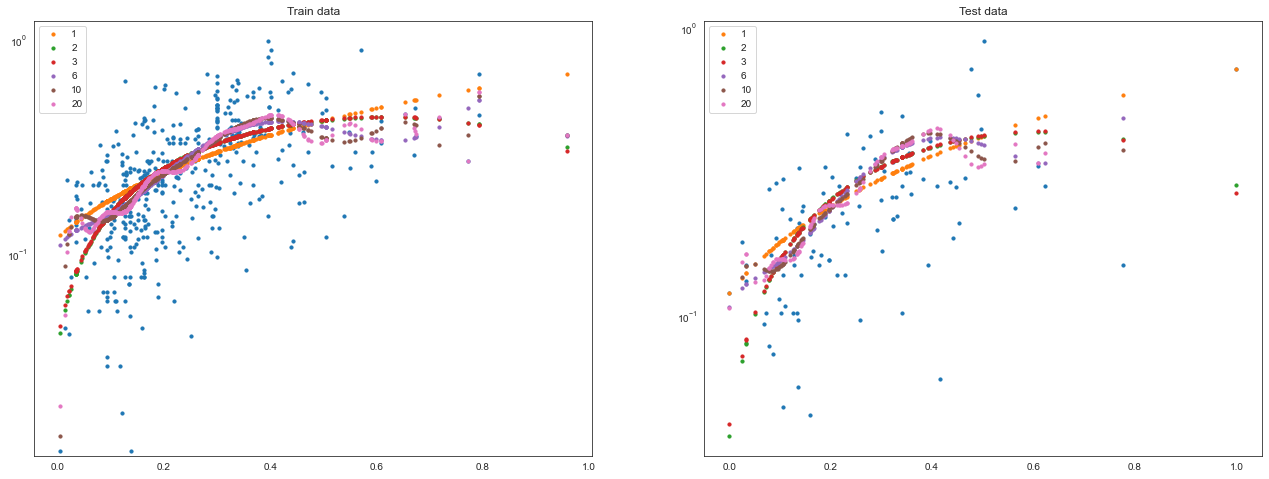

In [53]:
# visualise train and test predictions, note that the y axis is on a log scale
plt.figure(figsize=(22, 8))

# train data
plt.subplot(121)
plt.scatter(x_train, y_train, s=10)
for i, degree in enumerate(degrees):    
    plt.scatter(x_train, y_train_pred[:, i], s=10, label=str(degree))
    plt.legend(loc='upper left')
plt.yscale('log')
plt.title("Train data")

    
# test data
plt.subplot(122)
plt.scatter(x_test, y_test, s=10)
for i, degree in enumerate(degrees):    
    plt.scatter(x_test, y_test_pred[:, i], s=10, label=str(degree))
    plt.legend(loc='upper left')
plt.yscale('log')
plt.title("Test data")


In [54]:
# compare r2 for train and test sets (for all polynomial fits)
import sklearn.metrics

print("R-squared values: \n")
for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

R-squared values: 

Polynomial degree 1: train score=0.28, test score=0.3
Polynomial degree 2: train score=0.33, test score=0.26
Polynomial degree 3: train score=0.33, test score=0.25
Polynomial degree 6: train score=0.36, test score=-0.04
Polynomial degree 10: train score=0.37, test score=-218.78
Polynomial degree 20: train score=0.37, test score=-102340492580.92


## Building Multiple Linear Regression Model Without Cross-Validation 

### Step 1: Load the dataset

In [55]:
df1 = pd.read_csv('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Housing.csv')
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 2: Apply EDA

Univariate and bivariate analysis

### Step 3. Pre-process and extract the features

In [56]:
# data preparation - list of all the "yes-no" binary categorical variables
# we will map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
df1[binary_vars_list] = df1[binary_vars_list].apply(binary_map)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [57]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(df1['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [58]:
# concat the dummy variable df with the main df
df1 = pd.concat([df1, status], axis = 1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [59]:
# remove 'furnishingstatus' since we alreday have the dummy vars
df1.drop(['furnishingstatus'], axis = 1, inplace = True)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [60]:
# extracting relevant features
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
temp = df1[numeric_vars]
temp.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [61]:
# rescale the features between 0 to 1
scaler = MinMaxScaler()
temp1 = scaler.fit_transform(temp)
temp1 = pd.DataFrame(temp1,columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'])
temp1.head()

,area,bedrooms,bathrooms,stories,parking,price
0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000
1,0.502405,0.6,1.000000,1.000000,1.000000,0.909091
2,0.571134,0.4,0.333333,0.333333,0.666667,0.909091
3,0.402062,0.6,0.333333,0.333333,1.000000,0.906061
4,0.396564,0.6,0.000000,0.333333,0.666667,0.836364


In [62]:
df2 = df1[["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "semi-furnished"]] 
df2.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


In [63]:
pre_processed_data = pd.concat([df2,temp1],axis=1)
pre_processed_data.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000
1,1,0,0,0,1,0,0,0.502405,0.6,1.000000,1.000000,1.000000,0.909091
2,1,0,1,0,0,1,1,0.571134,0.4,0.333333,0.333333,0.666667,0.909091
3,1,0,1,0,1,1,0,0.402062,0.6,0.333333,0.333333,1.000000,0.906061
4,1,1,1,0,1,0,0,0.396564,0.6,0.000000,0.333333,0.666667,0.836364


In [64]:
pre_processed_data.shape

(545, 13)

### Step 4. Split the data for training and testing

In [65]:
train, test = train_test_split(pre_processed_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [66]:
# divide into X_train, y_train, X_test, y_test
y_train = train.pop('price')
x_train = train

y_test = test.pop('price')
x_test = test

In [67]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(x_train, y_train)

# predict prices of X_test
y_pred = lm.predict(x_test)

### R2 Score

In [68]:
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.67767446576476


### Problems in the Current Approach
In train-test split, we have three options:
1. **Simply split into train and test**: But that way tuning a hyperparameter makes the model 'see' the test data (i.e. knowledge of test data leaks into the model)
2. **Split into train, validation, test sets**: Then the validation data would eat into the training set
3. **Cross-validation**: Split into train and test, and train multiple models by sampling the train set. Finally, just test once on the test set.


## Cross-Validation for Multiple Linear Regression

#### K-Fold Cross-Validation

In [69]:
# k-fold CV (using all the 13 variables)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores      

array([0.64469087, 0.70115779, 0.61726174, 0.66130751, 0.59038153])

In [70]:
# the other way of doing the same thing (more explicit)
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
scores   

array([0.59246218, 0.69380963, 0.67252609, 0.62082293, 0.60796825])

In [71]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.01115667, -0.00765919, -0.00606751, -0.00748722, -0.01390484])

### Types of Cross-Validation Schemes


1. **K-Fold** cross-validation: Most common
2. **Leave One Out (LOO)**: Takes each data point as the 'test sample' once, and trains the model on the rest n-1 data points. Thus, it trains n total models.
    - Advantage: Utilises the data well since each model is trained on n-1 samples
    - Disadvantage: Computationally expensive
3. **Leave P-Out (LPO)**: Creat all possible splits after leaving p samples out. For n data points, there are (nCp) possibile train-test splits.
4. (**For classification problems**) **Stratified K-Fold**: Ensures that the relative class proportion is approximately preserved in each train and validation fold. Important when ther eis huge class imbalance (e.g. 98% good customers, 2% bad).
 